In [170]:
from statsbombpy import sb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import to_rgba
import numpy as np
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math
import warnings
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [171]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [172]:
matches = pd.DataFrame(sb.matches(competition_id=43	, season_id=3))
matches.columns
matches.drop(columns=["kick_off",'season','referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version','match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week'],inplace=True)
for i in range(len(matches)):
    if matches["stadium"][i].startswith("\t"):
        matches["stadium"][i] = matches["stadium"][i][2:]

In [173]:
matches = matches.sort_values(by='match_date').reset_index(drop=True)
matches.head(60)

,match_id,match_date,competition,home_team,away_team,home_score,away_score,competition_stage,stadium
0,7525,2018-06-14,International - FIFA World Cup,Russia,Saudi Arabia,5,0,Group Stage,Stadion Luzhniki
1,7578,2018-06-15,International - FIFA World Cup,Egypt,Uruguay,0,1,Group Stage,katerinburg Arena
2,7577,2018-06-15,International - FIFA World Cup,Morocco,Iran,0,1,Group Stage,Saint-Petersburg Stadium
3,7576,2018-06-15,International - FIFA World Cup,Portugal,Spain,3,3,Group Stage,limpiyskiy Stadion Fisht
4,7531,2018-06-16,International - FIFA World Cup,Argentina,Iceland,1,1,Group Stage,Otkrytiye Arena (Moskva)
5,7529,2018-06-16,International - FIFA World Cup,Croatia,Nigeria,2,0,Group Stage,Stadion Kaliningrad
6,7532,2018-06-16,International - FIFA World Cup,Peru,Denmark,0,1,Group Stage,Mordovia Arena
7,7530,2018-06-16,International - FIFA World Cup,France,Australia,2,1,Group Stage,Kazan'' Arena
8,7534,2018-06-17,International - FIFA World Cup,Germany,Mexico,0,1,Group Stage,Stadion Luzhniki
9,7533,2018-06-17,International - FIFA World Cup,Brazil,Switzerland,1,1,Group Stage,ostov Arena


## تفاصيل المباراة

In [174]:
MatchDetails=pd.DataFrame(matches.loc[matches.match_id==7584]).reset_index(drop=True)

ID = MatchDetails.at[0, 'match_id']
Date = MatchDetails.at[0, 'match_date']
home = MatchDetails.at[0, 'home_team']
away = MatchDetails.at[0, 'away_team']
homeScore = MatchDetails.at[0, 'home_score']
awayScore = MatchDetails.at[0, 'away_score']
stage = MatchDetails.at[0, 'competition_stage']
stadium = MatchDetails.at[0, 'stadium']
version = 2018
competetion = 'FIFA World Cup'
for i in [Date,home,away,homeScore,awayScore,stage,stadium]:
    print(i)

2018-07-02
Belgium
Japan
3
2
Round of 16
ostov Arena


## قائمة الفريقين للمباراة

In [175]:
homeTeam = pd.DataFrame(sb.lineups(match_id=ID)[home])
awayTeam = pd.DataFrame(sb.lineups(match_id=ID)[away])

In [176]:
homeTeam

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3077,Jan Vertonghen,None,5,Belgium,[],"[{'position_id': 5, 'position': 'Left Center B..."
1,3089,Kevin De Bruyne,None,7,Belgium,[],"[{'position_id': 13, 'position': 'Right Center..."
2,3101,Vincent Kompany,None,4,Belgium,[],"[{'position_id': 4, 'position': 'Center Back',..."
3,3176,Thomas Meunier,None,15,Belgium,[],"[{'position_id': 7, 'position': 'Right Wing Ba..."
4,3289,Romelu Lukaku Menama,Romelu Lukaku,9,Belgium,[],"[{'position_id': 23, 'position': 'Center Forwa..."
5,3296,Marouane Fellaini-Bakkioui,Marouane Fellaini,8,Belgium,[],"[{'position_id': 18, 'position': 'Right Attack..."
6,3509,Thibaut Courtois,None,1,Belgium,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
7,3621,Eden Hazard,None,10,Belgium,[],"[{'position_id': 20, 'position': 'Left Attacki..."
8,4831,Nacer Chadli,None,22,Belgium,[],"[{'position_id': 8, 'position': 'Left Wing Bac..."
9,5630,Dries Mertens,None,14,Belgium,[],"[{'position_id': 18, 'position': 'Right Attack..."


In [177]:
awayTeam

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3175,Eiji Kawashima,None,1,Japan,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
1,3300,Maya Yoshida,None,22,Japan,[],"[{'position_id': 3, 'position': 'Right Center ..."
2,3530,Hiroki Sakai,None,19,Japan,[],"[{'position_id': 2, 'position': 'Right Back', ..."
3,5679,Yūya Ōsako,None,15,Japan,[],"[{'position_id': 23, 'position': 'Center Forwa..."
4,5681,Makoto Hasebe,None,17,Japan,[],"[{'position_id': 9, 'position': 'Right Defensi..."
5,5682,Gen Shōji,None,3,Japan,[],"[{'position_id': 5, 'position': 'Left Center B..."
6,5683,Keisuke Honda,None,4,Japan,[],"[{'position_id': 17, 'position': 'Right Wing',..."
7,5684,Shinji Kagawa,None,10,Japan,[],"[{'position_id': 19, 'position': 'Center Attac..."
8,5687,Takashi Inui,None,14,Japan,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
9,5690,Yuto Nagatomo,None,5,Japan,[],"[{'position_id': 6, 'position': 'Left Back', '..."


## الهدف من الكام سطر الحلوين دول اني اخلي اسماء اللاعبين مختصرة قدر الامكان

In [178]:
list = []
dict = {}

for i in range(len(homeTeam)):
        if len(homeTeam["positions"][i]) == 0:
            list.append(i)
        if homeTeam["player_nickname"][i] == None:
            playername = homeTeam["player_name"][i]
        elif len(homeTeam["player_name"][i]) > len(homeTeam["player_nickname"][i]):
            playername = homeTeam["player_nickname"][i]
        elif len(homeTeam["player_name"][i]) == len(homeTeam["player_nickname"][i]):
            playername = homeTeam["player_name"][i]
        homeTeam["player_name"][i]=playername
        dict[homeTeam["player_id"][i]]=homeTeam["player_name"][i]

        
homeTeam.drop(columns=["player_nickname"],inplace=True)
homeTeamPlayers=homeTeam.drop(homeTeam.index[list]).reset_index(drop=True)
homeTeamPlayers

,player_id,player_name,jersey_number,country,cards,positions
0,3077,Jan Vertonghen,5,Belgium,[],"[{'position_id': 5, 'position': 'Left Center B..."
1,3089,Kevin De Bruyne,7,Belgium,[],"[{'position_id': 13, 'position': 'Right Center..."
2,3101,Vincent Kompany,4,Belgium,[],"[{'position_id': 4, 'position': 'Center Back',..."
3,3176,Thomas Meunier,15,Belgium,[],"[{'position_id': 7, 'position': 'Right Wing Ba..."
4,3289,Romelu Lukaku,9,Belgium,[],"[{'position_id': 23, 'position': 'Center Forwa..."
5,3296,Marouane Fellaini,8,Belgium,[],"[{'position_id': 18, 'position': 'Right Attack..."
6,3509,Thibaut Courtois,1,Belgium,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
7,3621,Eden Hazard,10,Belgium,[],"[{'position_id': 20, 'position': 'Left Attacki..."
8,4831,Nacer Chadli,22,Belgium,[],"[{'position_id': 8, 'position': 'Left Wing Bac..."
9,5630,Dries Mertens,14,Belgium,[],"[{'position_id': 18, 'position': 'Right Attack..."


In [179]:
list = []


for i in range(len(awayTeam)):
        if len(awayTeam["positions"][i]) == 0:
            list.append(i)
        if awayTeam["player_nickname"][i] == None:
            playername = awayTeam["player_name"][i]
        elif len(awayTeam["player_name"][i]) > len(awayTeam["player_nickname"][i]):
            playername = awayTeam["player_nickname"][i]
        elif len(awayTeam["player_name"][i]) == len(awayTeam["player_nickname"][i]):
            playername = awayTeam["player_name"][i]
        awayTeam["player_name"][i]=playername
        dict[awayTeam["player_id"][i]]=awayTeam["player_name"][i]
awayTeam.drop(columns=["player_nickname"],inplace=True)
awayTeamPlayers=awayTeam.drop(awayTeam.index[list]).reset_index(drop=True)
awayTeamPlayers

,player_id,player_name,jersey_number,country,cards,positions
0,3175,Eiji Kawashima,1,Japan,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
1,3300,Maya Yoshida,22,Japan,[],"[{'position_id': 3, 'position': 'Right Center ..."
2,3530,Hiroki Sakai,19,Japan,[],"[{'position_id': 2, 'position': 'Right Back', ..."
3,5679,Yūya Ōsako,15,Japan,[],"[{'position_id': 23, 'position': 'Center Forwa..."
4,5681,Makoto Hasebe,17,Japan,[],"[{'position_id': 9, 'position': 'Right Defensi..."
5,5682,Gen Shōji,3,Japan,[],"[{'position_id': 5, 'position': 'Left Center B..."
6,5683,Keisuke Honda,4,Japan,[],"[{'position_id': 17, 'position': 'Right Wing',..."
7,5684,Shinji Kagawa,10,Japan,[],"[{'position_id': 19, 'position': 'Center Attac..."
8,5687,Takashi Inui,14,Japan,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
9,5690,Yuto Nagatomo,5,Japan,[],"[{'position_id': 6, 'position': 'Left Back', '..."


In [180]:
dict

{3077: 'Jan Vertonghen',
 3089: 'Kevin De Bruyne',
 3101: 'Vincent Kompany',
 3176: 'Thomas Meunier',
 3289: 'Romelu Lukaku',
 3296: 'Marouane Fellaini',
 3509: 'Thibaut Courtois',
 3621: 'Eden Hazard',
 4831: 'Nacer Chadli',
 5630: 'Dries Mertens',
 5633: 'Yannick Carrasco',
 5642: 'Axel Witsel',
 20005: 'Toby Alderweireld',
 3175: 'Eiji Kawashima',
 3300: 'Maya Yoshida',
 3530: 'Hiroki Sakai',
 5679: 'Yūya Ōsako',
 5681: 'Makoto Hasebe',
 5682: 'Gen Shōji',
 5683: 'Keisuke Honda',
 5684: 'Shinji Kagawa',
 5687: 'Takashi Inui',
 5690: 'Yuto Nagatomo',
 5693: 'Gaku Shibasaki',
 5694: 'Hotaru Yamaguchi',
 5697: 'Genki Haraguchi'}

## التشكيل الأساسي للفريقين

In [181]:
for i in range(len(homeTeamPlayers)):
    if(homeTeamPlayers["positions"][i][0]["start_reason"]=="Starting XI"):
        print(homeTeamPlayers.player_name[i])

Jan Vertonghen
Kevin De Bruyne
Vincent Kompany
Thomas Meunier
Romelu Lukaku
Thibaut Courtois
Eden Hazard
Dries Mertens
Yannick Carrasco
Axel Witsel
Toby Alderweireld


In [182]:
for i in range(len(awayTeamPlayers)):
    if(awayTeamPlayers["positions"][i][0]["start_reason"]=="Starting XI"):
        print(awayTeamPlayers.player_name[i])

Eiji Kawashima
Maya Yoshida
Hiroki Sakai
Yūya Ōsako
Makoto Hasebe
Gen Shōji
Shinji Kagawa
Takashi Inui
Yuto Nagatomo
Gaku Shibasaki
Genki Haraguchi


## الانذارات

In [183]:
for i in range(len(homeTeamPlayers)):
    if(len(homeTeamPlayers["cards"][i])>0):
        print(homeTeamPlayers.player_name[i])

In [184]:
for i in range(len(awayTeamPlayers)):
    if(len(awayTeamPlayers["cards"][i])>0):
        print(awayTeamPlayers.player_name[i])

Gaku Shibasaki


## التبديلات

In [185]:
for i in range(len(homeTeamPlayers)):
    if(homeTeamPlayers["positions"][i][0]["start_reason"]!="Starting XI"):
        print(homeTeamPlayers.player_name[i])

Marouane Fellaini
Nacer Chadli


In [186]:
for i in range(len(awayTeamPlayers)):
    if(awayTeamPlayers["positions"][i][0]["start_reason"]!="Starting XI"):
        print(awayTeamPlayers.player_name[i])

Keisuke Honda
Hotaru Yamaguchi


## التسديدات على الجول

In [187]:
shots = pd.DataFrame(sb.events(match_id=ID,split=True, flatten_attrs=False)["shots"])

keysList = [key for key in dict]
keysList
for player in keysList:
    i=shots[shots['player_id']==player]
    player_index_list=i.index.to_list()

    player_col =shots.columns.get_loc("player")
    for index in player_index_list:
        shots.iloc[index,player_col]=dict[player]
        
shots

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player,position,location,duration,related_events,shot,match_id,possession_team_id,player_id,under_pressure
0,16dfcc16-db39-4e15-b35a-e746c5060dd3,48,1,00:00:54.440,0,54,Shot,3,Japan,From Throw In,...,Shinji Kagawa,Center Attacking Midfield,"[98.0, 47.0]",1.133,[747af08f-934e-4bd3-b296-4a90973b7ca1],"{'statsbomb_xg': 0.024996893, 'end_location': ...",7584,778,5684,NaN
1,ffb56917-66ef-402b-9f84-2e107d19fd3f,448,1,00:09:14.600,9,14,Shot,17,Japan,From Free Kick,...,Gen Shōji,Left Center Back,"[74.0, 41.0]",1.933,[0990b237-915d-4ede-9040-c2da0b42ace9],"{'statsbomb_xg': 0.013225093, 'end_location': ...",7584,778,5682,NaN
2,3b23ba48-2e72-4b46-8a19-fc6b3a1dd177,677,1,00:15:13.520,15,13,Shot,29,Belgium,Regular Play,...,Axel Witsel,Left Center Midfield,"[95.0, 33.0]",0.160,"[096d64a3-75e7-4dc2-b57e-20df3f5a6914, a7ba1d3...","{'statsbomb_xg': 0.043376084, 'end_location': ...",7584,782,5642,NaN
3,60511bde-a9f3-49d8-94ec-aabd7fa85cad,688,1,00:15:58.760,15,58,Shot,30,Belgium,From Corner,...,Vincent Kompany,Center Back,"[111.0, 51.0]",0.600,"[a4e96a1a-2257-4bc2-9085-7480d0b57feb, e81a06e...","{'statsbomb_xg': 0.010093679, 'end_location': ...",7584,782,3101,True
4,7c5764d1-639a-4a3c-822c-ff2e290693cc,712,1,00:16:33.680,16,33,Shot,30,Belgium,From Corner,...,Romelu Lukaku,Center Forward,"[105.0, 40.0]",0.120,"[8822410a-9327-4662-b71f-2a945a54b840, 8c59fab...","{'statsbomb_xg': 0.046488736, 'end_location': ...",7584,782,3289,NaN
5,c7e2425c-3b79-46be-b8e8-ea9405aff9f2,718,1,00:17:16.133,17,16,Shot,31,Belgium,From Corner,...,Vincent Kompany,Center Back,"[111.0, 48.0]",1.090,"[9e80581a-68c1-42a5-a2fb-2cc29f223e53, 9ee2a51...","{'statsbomb_xg': 0.029675562, 'end_location': ...",7584,782,3101,True
6,43a70a97-7c68-403d-81fe-4ac6c365d389,723,1,00:17:17.440,17,17,Shot,31,Belgium,From Corner,...,Vincent Kompany,Center Back,"[112.0, 50.0]",1.173,"[1a269977-72c9-4e2d-9025-acfbb2dcfb95, 8d90abf...","{'statsbomb_xg': 0.0671176, 'end_location': [1...",7584,782,3101,True
7,80980d21-fce5-4a3e-96d2-3e64c6e8a9c0,846,1,00:20:10.680,20,10,Shot,35,Belgium,From Throw In,...,Romelu Lukaku,Center Forward,"[101.0, 50.0]",0.240,"[70386952-9e84-4b81-9375-66f9952dc06c, 905757f...","{'statsbomb_xg': 0.05464871, 'end_location': [...",7584,782,3289,NaN
8,3484c808-5d51-4aad-a8a9-180a13028461,1046,1,00:24:53.280,24,53,Shot,43,Belgium,Regular Play,...,Romelu Lukaku,Center Forward,"[114.0, 41.0]",0.840,"[0c488dab-261e-4d12-97b1-d5968078727c, 7d69bd4...","{'one_on_one': True, 'statsbomb_xg': 0.3411106...",7584,782,3289,True
9,1b863b26-4d2e-4ace-b9c1-5b02551634ae,1107,1,00:26:05.600,26,5,Shot,44,Belgium,Regular Play,...,Kevin De Bruyne,Right Center Midfield,"[102.0, 46.0]",0.880,"[b18cd61e-dccd-419a-9810-3a23c4740a35, e590cb7...","{'statsbomb_xg': 0.106753215, 'end_location': ...",7584,782,3089,NaN


## الأهداف بالخطأ

In [188]:
events = sb.events(match_id=ID)
ownGoals = pd.DataFrame(events.loc[(events['type']=='Own Goal Against')].reset_index(drop=True))
ownGoals = ownGoals[['minute', 'second', 'play_pattern', 'team', 'player', 'position',
       'player_id', 'location','type']]
ownGoals

,minute,second,play_pattern,team,player,position,player_id,location,type


## التسديدات

### اعداد البيانات

In [189]:
shots.rename(columns = {'location':'Location'}, inplace = True)
shots["xG"] = 0
shots["Location X"] = 0
shots["Location Y"] = 0
shots["End Location X"] = 0
shots["End Location Y"] = 0
shots["Outcome"] = 0
for i in range(len(shots)):
    shots["xG"][i]=shots["shot"][i]["statsbomb_xg"]
    shots["Location X"][i]=shots['Location'][i][0]
    shots["Location Y"][i]=shots['Location'][i][1]
    shots["End Location X"][i]=shots["shot"][i]["end_location"][0]
    shots["End Location Y"][i]=shots["shot"][i]["end_location"][1]
    shots["Outcome"][i]=shots["shot"][i]["outcome"]['name']

shots.drop(columns=['id','Location','index','type','period', 'timestamp','duration','related_events', 'under_pressure','shot','match_id', 'possession_team_id','possession','possession_team'],inplace=True)

shots

,minute,second,play_pattern,team,player,position,player_id,xG,Location X,Location Y,End Location X,End Location Y,Outcome
0,0,54,From Throw In,Japan,Shinji Kagawa,Center Attacking Midfield,5684,0.024997,98,47,120,45.4,Off T
1,9,14,From Free Kick,Japan,Gen Shōji,Left Center Back,5682,0.013225,74,41,120,46.7,Off T
2,15,13,Regular Play,Belgium,Axel Witsel,Left Center Midfield,5642,0.043376,95,33,98,34.0,Blocked
3,15,58,From Corner,Belgium,Vincent Kompany,Center Back,3101,0.010094,111,51,114,46.0,Wayward
4,16,33,From Corner,Belgium,Romelu Lukaku,Center Forward,3289,0.046489,105,40,106,40.0,Blocked
5,17,16,From Corner,Belgium,Vincent Kompany,Center Back,3101,0.029676,111,48,113,50.0,Wayward
6,17,17,From Corner,Belgium,Vincent Kompany,Center Back,3101,0.067118,112,50,120,47.1,Off T
7,20,10,From Throw In,Belgium,Romelu Lukaku,Center Forward,3289,0.054649,101,50,103,50.0,Blocked
8,24,53,Regular Play,Belgium,Romelu Lukaku,Center Forward,3289,0.341111,114,41,116,40.0,Wayward
9,26,5,Regular Play,Belgium,Kevin De Bruyne,Right Center Midfield,3089,0.106753,102,46,110,40.0,Blocked


### خريطة التسديد

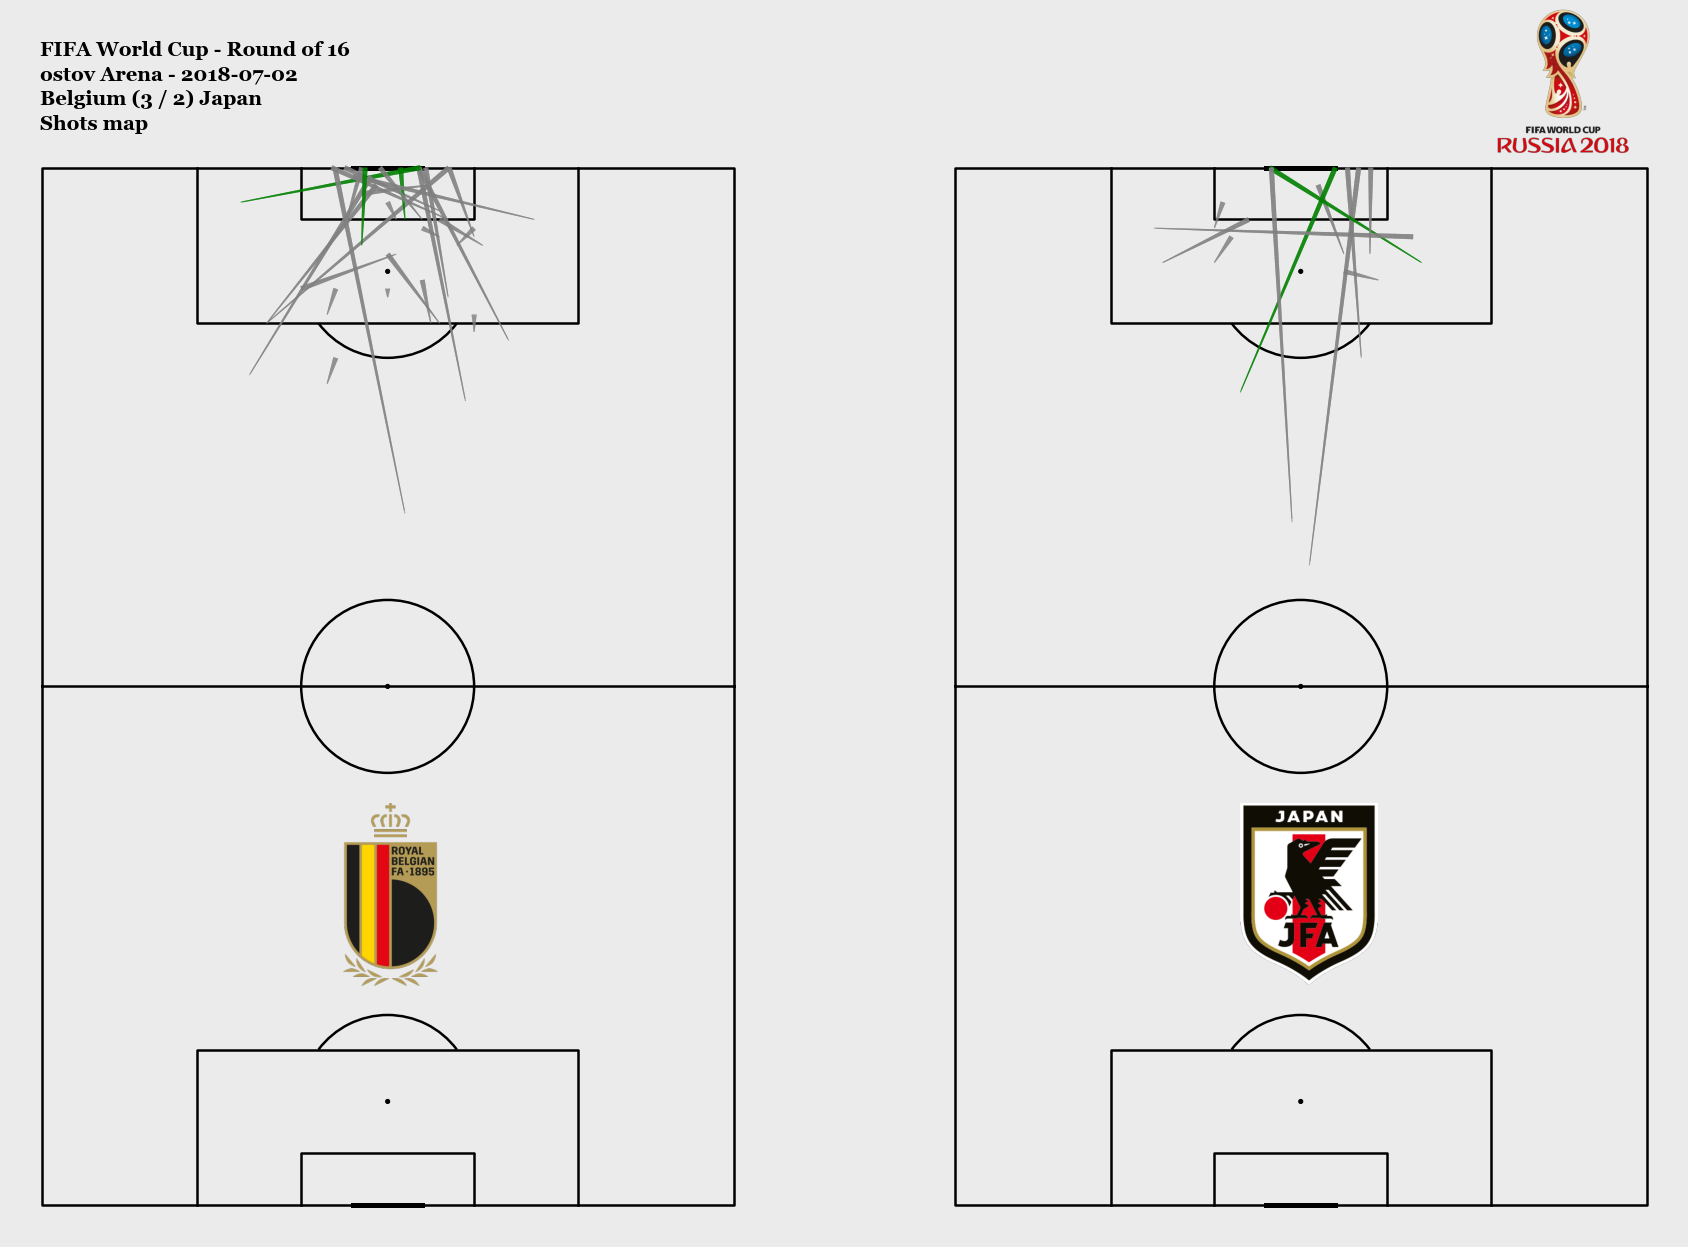

In [190]:
fig ,ax = plt.subplots(figsize=(15*2,17*2),ncols=2)
fig.set_facecolor('white')
pitch = VerticalPitch(half=False,line_color='black',linewidth=2.5,pitch_type="statsbomb")
pitch.draw(ax = ax[0])
pitch.draw(ax = ax[1])
ax[0].patch.set_facecolor('white')
ax[1].patch.set_facecolor('white')

for i in range(len(shots)):
    if ((shots["team"][i]==home) and (shots['Outcome'][i]!="Goal")):
            pitch.lines(shots["Location X"][i], shots["Location Y"][i],
                            shots["End Location X"][i], shots["End Location Y"][i], 
                            ax=ax[0],comet = True, color= "grey", lw=5, alpha = 0.7)

    elif((shots["team"][i]==home) and (shots['Outcome'][i]=="Goal")):
            pitch.lines(shots["Location X"][i], shots["Location Y"][i],
                            shots["End Location X"][i], shots["End Location Y"][i], 
                            ax=ax[0],comet = True, color= "green", lw=5, alpha = 0.7)

    elif ((shots["team"][i]==away)and (shots['Outcome'][i]!="Goal")):
            pitch.lines(shots["Location X"][i], shots["Location Y"][i],
                            shots["End Location X"][i], shots["End Location Y"][i], 
                            ax=ax[1],comet = True, color= "grey", lw=5, alpha = 0.7)

    elif ((shots["team"][i]==away)and (shots['Outcome'][i]=="Goal")):
            pitch.lines(shots["Location X"][i], shots["Location Y"][i],
                            shots["End Location X"][i], shots["End Location Y"][i], 
                            ax=ax[1],comet = True, color= "green", lw=5, alpha = 0.7)

for i in range(len(ownGoals)):
        if ownGoals['team'][i]== home:
                pitch.scatter(ownGoals["location"][i][0], ownGoals["location"][i][1], c="red",s =100, ax=ax[0], marker = 'football',ec='black', alpha = 1,zorder=5000)
        else:
                pitch.scatter(ownGoals["location"][i][0], ownGoals["location"][i][1], c="red",s =100, ax=ax[1], marker = 'football',ec='black', alpha = 1,zorder=5000)
              


"""heatmap = shots.loc[shots.team==home].reset_index(drop=True)
pitch.kdeplot(heatmap['Location X'],heatmap['Location Y'],ax=ax[0], shade=True,shade_lowest=False, zorder=-1)

heatmap = shots.loc[shots.team==away].reset_index(drop=True)
pitch.kdeplot(heatmap['Location X'],heatmap['Location Y'],ax=ax[1], shade=True,shade_lowest=False, zorder=-1)"""

Logo2 = fig.add_axes((0.8,0.72,0.12*0.75,0.08*0.75))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.265,0.38,0.125*0.6,0.125*0.6))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.69,0.38,0.125*0.6,0.125*0.6))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)


fig.text(s=f"{competetion} - {stage}",x=0.14,y=0.76,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"{stadium} - {Date}",x=.14,y=0.75,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"{home} ({homeScore} / {awayScore}) {away}",x=0.14,y=0.74,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"Shots map",x=0.14,y=0.73,color='black',fontsize=20,fontname="Georgia",fontweight='bold')

fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\Worldcup logos\{home} x {away} shots map.png",dpi=300,bbox_inches="tight")

## حمل الكرة

### اعداد البيانات

In [191]:
events = sb.events(match_id=ID)
carries = pd.DataFrame(events.loc[(events['type']=='Carry')].reset_index(drop=True))
carries = carries[['minute', 'second', 'play_pattern', 'team', 'player', 'position',
       'player_id', 'location','carry_end_location','type']]
carries

,minute,second,play_pattern,team,player,position,player_id,location,carry_end_location,type
0,0,1,From Kick Off,Belgium,Axel Witsel,Left Center Midfield,5642.0,"[49.0, 43.0]","[48.0, 40.0]",Carry
1,0,4,From Kick Off,Belgium,Jan Vertonghen,Left Center Back,3077.0,"[36.0, 9.0]","[36.0, 11.0]",Carry
2,0,6,From Kick Off,Belgium,Vincent Kompany,Center Back,3101.0,"[25.0, 26.0]","[24.0, 28.0]",Carry
3,0,8,From Kick Off,Belgium,Toby Alderweireld,Right Center Back,20005.0,"[23.0, 54.0]","[24.0, 54.0]",Carry
4,0,15,From Kick Off,Belgium,Jan Vertonghen,Left Center Back,3077.0,"[17.0, 6.0]","[18.0, 5.0]",Carry
...,...,...,...,...,...,...,...,...,...,...
832,91,38,Regular Play,Japan,Makoto Hasebe,Right Defensive Midfield,5681.0,"[61.0, 24.0]","[59.0, 24.0]",Carry
833,91,41,Regular Play,Japan,Gen Shōji,Left Center Back,5682.0,"[50.0, 29.0]","[63.0, 44.0]",Carry
834,93,32,From Keeper,Belgium,Thibaut Courtois,Goalkeeper,3509.0,"[5.0, 41.0]","[19.0, 40.0]",Carry
835,93,36,From Keeper,Belgium,Kevin De Bruyne,Right Center Midfield,3089.0,"[34.0, 53.0]","[71.0, 41.0]",Carry


### خريطة حمل الكرة

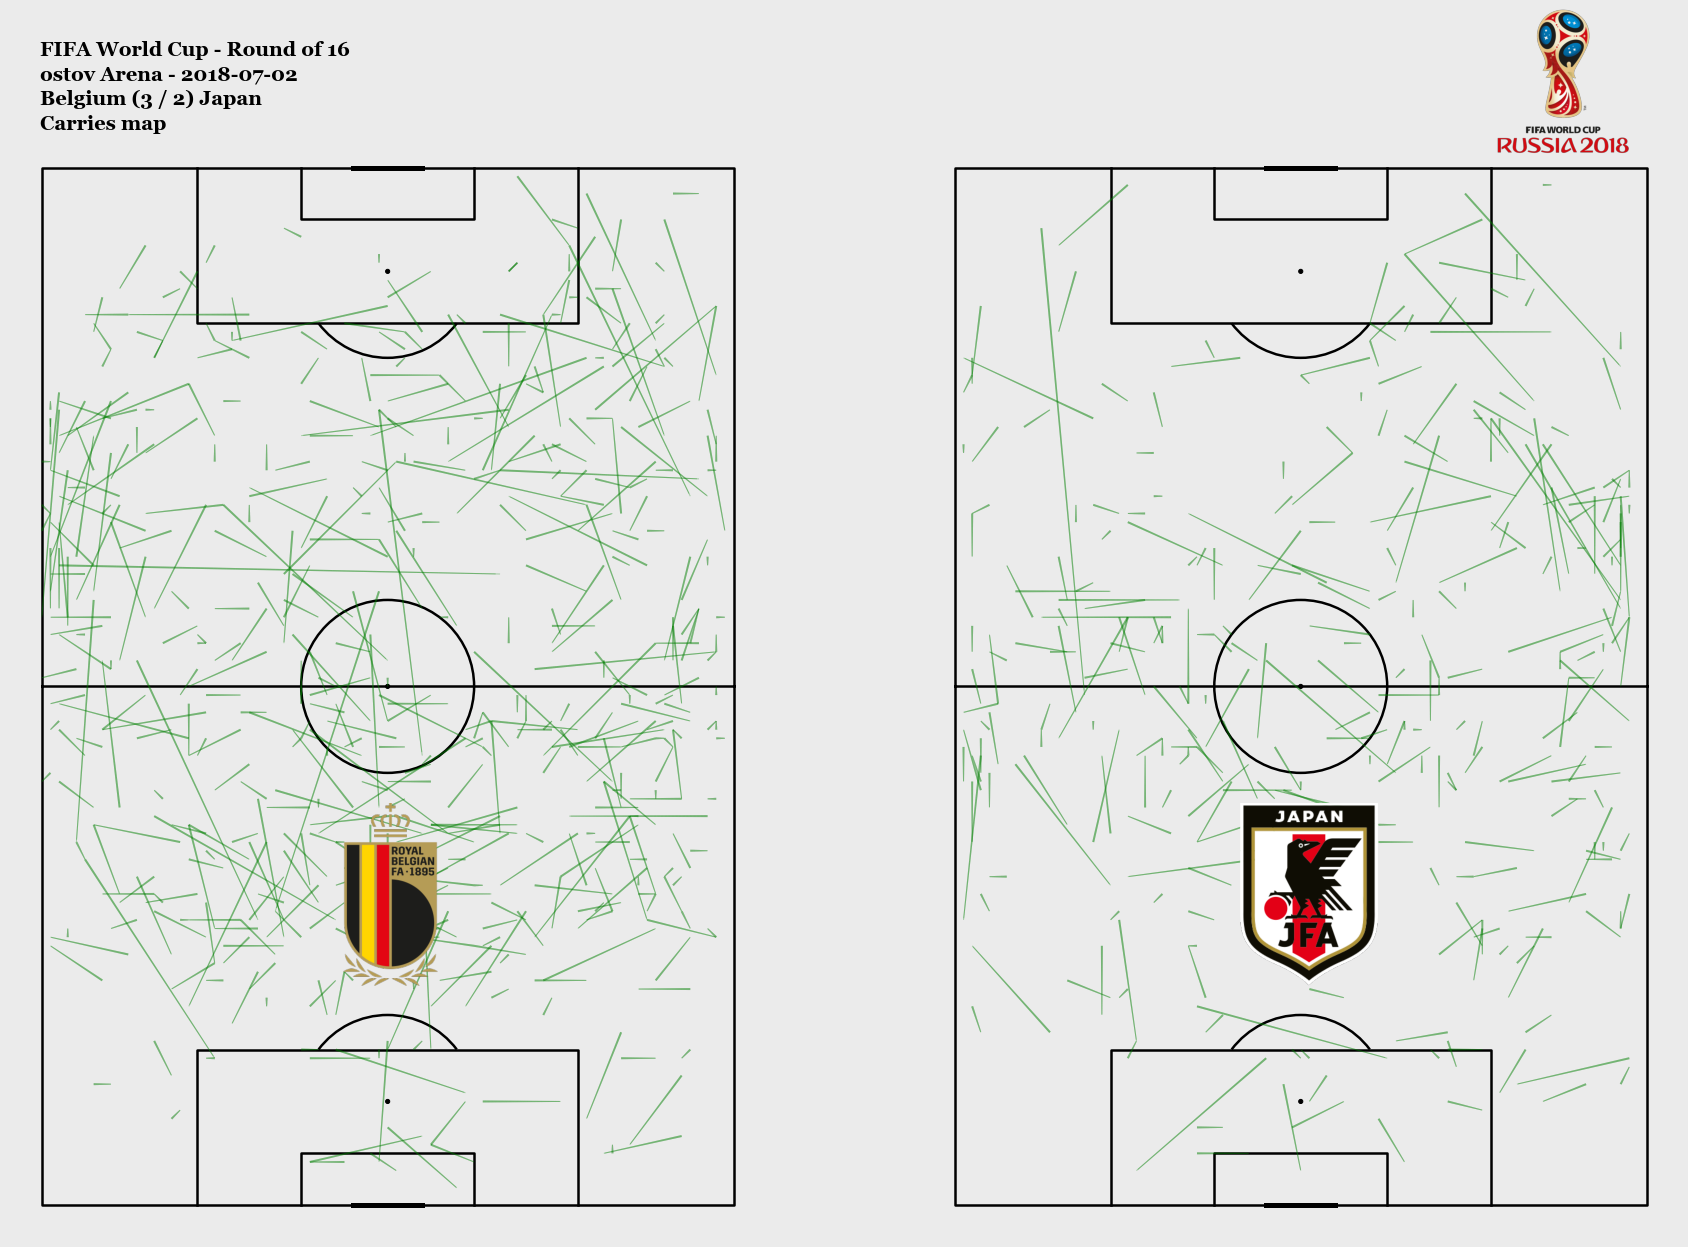

In [192]:
fig ,ax = plt.subplots(figsize=(15*2,17*2),ncols=2)
fig.set_facecolor('white')
pitch = VerticalPitch(half=False,line_color='black',linewidth=2.5,pitch_type="statsbomb")
for i in range(0,2):
        pitch.draw(ax = ax[i])
        ax[i].patch.set_facecolor('white')
        ax[i].invert_xaxis()

for i in range(len(carries)):
    if ((carries["team"][i]==home)):
            pitch.lines(carries["location"][i][0], carries["location"][i][1],
                            carries["carry_end_location"][i][0], carries["carry_end_location"][i][1], 
                            ax=ax[0],comet = True, color= "green", lw=2, alpha = 0.3)
    elif ((carries["team"][i]==away)):
            pitch.lines(carries["location"][i][0], carries["location"][i][1],
                            carries["carry_end_location"][i][0], carries["carry_end_location"][i][1], 
                            ax=ax[1],comet = True, color= "green", lw=2, alpha = 0.3)

Logo2 = fig.add_axes((0.8,0.72,0.12*0.75,0.08*0.75))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.265,0.38,0.125*0.6,0.125*0.6))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.69,0.38,0.125*0.6,0.125*0.6))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

fig.text(s=f"{competetion} - {stage}",x=0.14,y=0.76,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"{stadium} - {Date}",x=.14,y=0.75,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"{home} ({homeScore} / {awayScore}) {away}",x=0.14,y=0.74,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.text(s=f"Carries map",x=0.14,y=0.73,color='black',fontsize=20,fontname="Georgia",fontweight='bold')
fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')
fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\Worldcup logos\{home} x {away} carries map.png",dpi=300,bbox_inches="tight")


### حمل الكرة حسب اللاعب

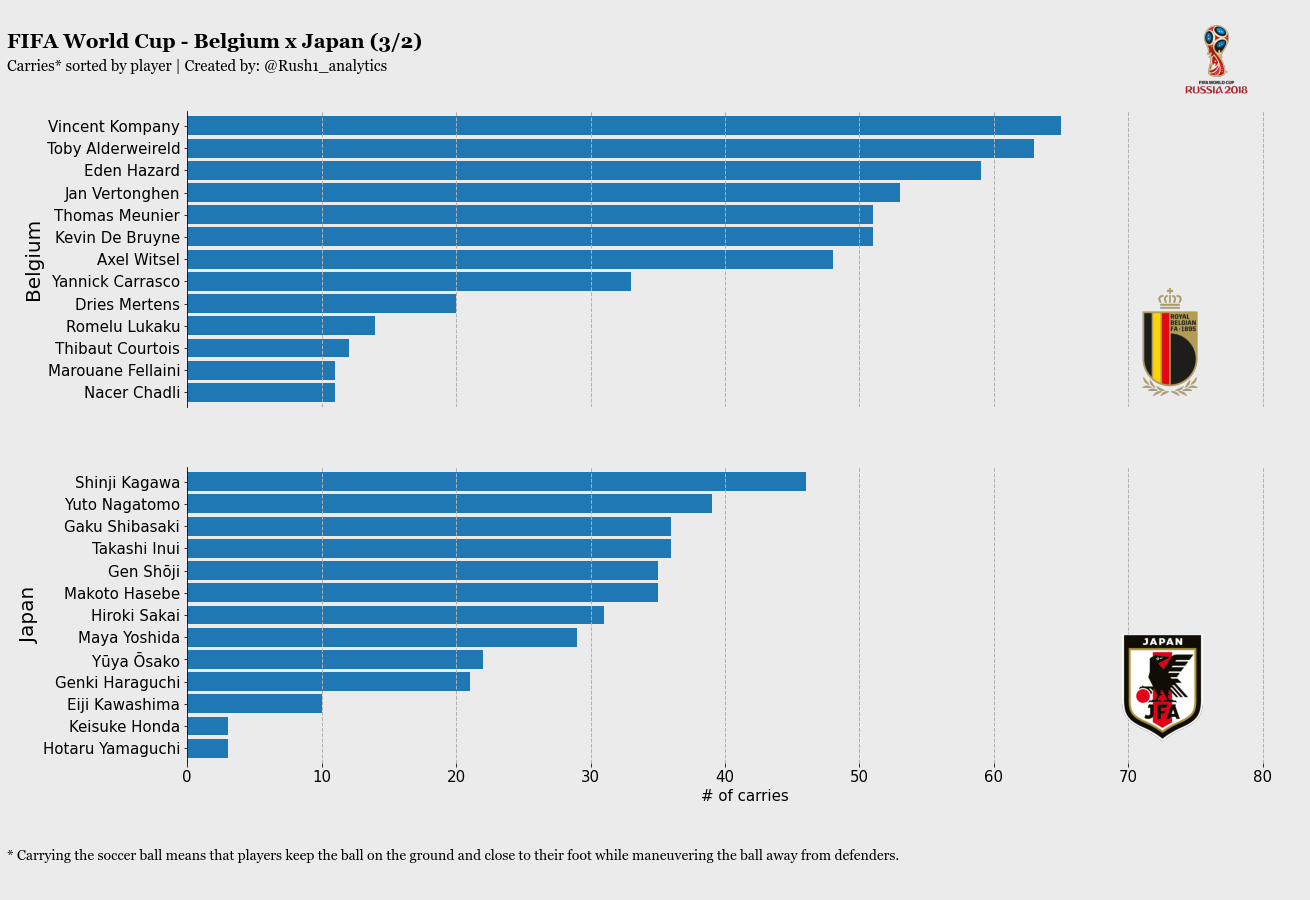

In [193]:
plt.rcParams.update({'font.size':15})

fig ,ax = plt.subplots(figsize=(20,12),nrows=2)

events = sb.events(match_id=ID)
carries = pd.DataFrame(events.loc[(events['type']=='Carry')].reset_index(drop=True))
carries = carries[['minute', 'second', 'play_pattern', 'team', 'player', 'position',
       'player_id', 'location','carry_end_location','type']]

keysList = [key for key in dict]
keysList
for player in keysList:
    i=carries[carries['player_id']==player]
    player_index_list=i.index.to_list()

    player_col =carries.columns.get_loc("player")
    for index in player_index_list:
        carries.iloc[index,player_col]=dict[player]


SortedCarries= pd.DataFrame({'count' : carries.groupby( [ "player", "team"] ).size()}).reset_index().sort_values(by='count')

HomeSortedCarries = SortedCarries[SortedCarries['team']==home].reset_index(drop=True)
awaySortedCarries = SortedCarries[SortedCarries['team']==away].reset_index(drop=True)

HomeSortedCarries.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[0],
    mark_right = True,figsize=(20,12),width=0.85)

awaySortedCarries.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[1],
    mark_right = True,figsize=(20,12),width=0.85)

ax[0].set_xlim([0, max(SortedCarries['count'])+18])
ax[1].set_xlim([0, max(SortedCarries['count'])+18])

#ax[0].invert_xaxis()

Logo2 = fig.add_axes((0.745,0.55,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.74,0.15,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

for i in range(0,2):
    ax[i].get_legend().remove()
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(axis='x',linestyle = '--', linewidth = 1)

ax[0].set_xticklabels([])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].set_ylabel(home,fontsize=20)
ax[1].set_ylabel(away,fontsize=20)
ax[1].set_xlabel('# of carries',fontsize=15)
fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

Header = fig.add_axes((0,0.925,0.12*7.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)

Logo2 = fig.add_axes((0.8,0.9,0.08,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header.text(s=f"{competetion} - {home} x {away} ({homeScore}/{awayScore})",x=0,y=0.375,color='black',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Carries* sorted by player | Created by: @Rush1_analytics",x=0,y=0.015,color='black',fontsize=15,fontname="Georgia")   

Footer = fig.add_axes((0,-0.025,0.12*7.25,0.06*1.25))
Footer.axis('off')
Footer.set_zorder(-1)
Footer.set_facecolor('white')
Footer.grid(False)
Footer.text(s=f"* Carrying the soccer ball means that players keep the ball on the ground and close to their foot while maneuvering the ball away from defenders.",x=0,y=.5,color='black',fontsize=14,fontname="Georgia")

plt.show()
fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\trial.png",dpi=300,bbox_inches="tight",facecolor='#ebebeb')

plt.show()

## التمريرات

### اعداد البيانات

In [194]:
events = sb.events(match_id=ID)
passes = pd.DataFrame(events.loc[(events['type']=='Pass')].reset_index(drop=True))
passes = passes[['minute','second','player','player_id','team','location','pass_end_location','pass_recipient','pass_length','pass_height','type','pass_type','pass_outcome']]

passes["Location X"] = 0
passes["Location Y"] = 0
passes["End Location X"] = 0
passes["End Location Y"] = 0

for i in range(len(passes)):
    passes["Location X"][i]=passes['location'][i][0]
    passes["Location Y"][i]=passes['location'][i][1]
    passes["End Location X"][i]=passes["pass_end_location"][i][0]
    passes["End Location Y"][i]=passes["pass_end_location"][i][1]
passes.drop(columns=['location','pass_end_location','pass_type'],inplace=True)
passes.pass_outcome.fillna('Complete',inplace=True)
passes

,minute,second,player,player_id,team,pass_recipient,pass_length,pass_height,type,pass_outcome,Location X,Location Y,End Location X,End Location Y
0,0,0,Romelu Lukaku Menama,3289.0,Belgium,Axel Witsel,12.369317,Ground Pass,Pass,Complete,61,40,49,43
1,0,3,Axel Witsel,5642.0,Belgium,Jan Vertonghen,33.241540,Ground Pass,Pass,Complete,48,40,36,9
2,0,5,Jan Vertonghen,3077.0,Belgium,Vincent Kompany,18.601076,Ground Pass,Pass,Complete,36,11,25,26
3,0,7,Vincent Kompany,3101.0,Belgium,Toby Alderweireld,26.019224,Ground Pass,Pass,Complete,24,28,23,54
4,0,11,Toby Alderweireld,20005.0,Belgium,Vincent Kompany,20.248457,Ground Pass,Pass,Complete,24,54,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,93,31,Keisuke Honda,5683.0,Japan,NaN,39.115215,High Pass,Pass,Incomplete,119,1,116,40
1071,93,34,Thibaut Courtois,3509.0,Belgium,Kevin De Bruyne,19.849434,Ground Pass,Pass,Complete,19,40,34,53
1072,93,39,Kevin De Bruyne,3089.0,Belgium,Thomas Meunier,33.615470,Ground Pass,Pass,Complete,71,41,100,58
1073,93,42,Thomas Meunier,3176.0,Belgium,Nacer Chadli,24.166092,Ground Pass,Pass,Complete,101,58,111,36


### فرز حسب النتيجة

In [195]:
SortedPasses= pd.DataFrame({'count' : passes.groupby( [ "player","team",'pass_outcome','player_id'] ).size()}).reset_index()
players_passes = pd.DataFrame()

for x in SortedPasses.player.unique():
    filter_player = SortedPasses.loc[SortedPasses.player==x].reset_index(drop=True)
    filter_player['Completed']=0
    filter_player['Incompleted']=0
    filter_player['Out']=0
    filter_player['Pass Offside']=0
    filter_player['Unknown']=0
    filter_player["Completed"][0]=filter_player.loc[filter_player['pass_outcome']=='Complete']['count']
    filter_player["Incompleted"][0]=filter_player.loc[filter_player['pass_outcome']=='Incomplete']['count']
    filter_player["Out"][0]=filter_player.loc[filter_player['pass_outcome']=='Out']['count']
    filter_player["Pass Offside"][0]=filter_player.loc[filter_player['pass_outcome']=='Pass Offside']['count']
    filter_player["Unknown"][0]=filter_player.loc[filter_player['pass_outcome']=='Unknown']['count']
    filter_player = pd.DataFrame(filter_player.iloc[0,:])
    filter_player.fillna(0,inplace=True)
    filter_player = filter_player.T
    filter_player['count']=filter_player['Completed']+filter_player['Incompleted']+filter_player['Out']+filter_player['Pass Offside']+filter_player['Unknown']
    players_passes=pd.concat([players_passes, filter_player])
    players_passes.drop(columns=['pass_outcome','count'],inplace=True)
players_passes = players_passes.sort_values(by=['Completed'],ascending=True)

players_passes.index = range(len(players_passes))

keysList = [key for key in dict]
keysList
for player in keysList:
    i=players_passes[players_passes['player_id']==player]
    player_index_list=i.index.to_list()

    player_col =players_passes.columns.get_loc("player")
    for index in player_index_list:
        players_passes.iloc[index,player_col]=dict[player]

players_passes.drop(columns=['player_id'],inplace=True)

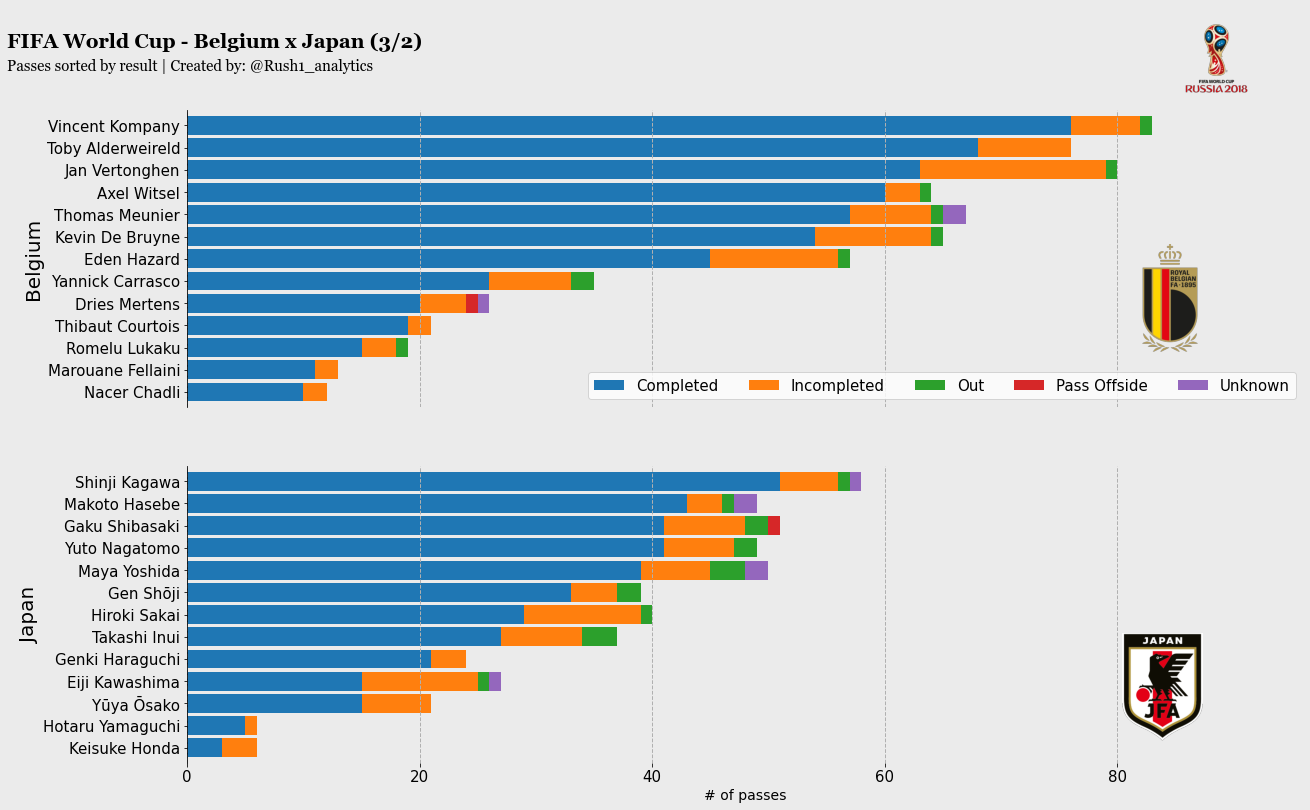

In [196]:
fig ,ax = plt.subplots(figsize=(20,12),nrows=2)

home_players_passes = players_passes[players_passes['team']==home].reset_index(drop=True)
away_players_passes = players_passes[players_passes['team']==away].reset_index(drop=True)

home_players_passes.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[0],
    mark_right = True,figsize=(20,12),width=0.85)

away_players_passes.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[1],
    mark_right = True,figsize=(20,12),width=0.85)

ax[0].set_xlim([0, max(players_passes.Completed)+20])
ax[1].set_xlim([0, max(players_passes.Completed)+20])

Logo2 = fig.add_axes((0.745,0.6,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.74,0.15,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

ax[0].set_xticklabels([])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[1].get_legend().remove()

for i in range(0,2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(axis='x',linestyle = '--', linewidth = 1)
    
ax[0].set_ylabel(home,fontsize=20)
ax[1].set_ylabel(away,fontsize=20)
ax[1].set_xlabel('# of passes',fontsize=14)
ax[0].legend(loc='best',ncol=5)

fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

Header = fig.add_axes((0,0.925,0.12*7.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)

Logo2 = fig.add_axes((0.8,0.9,0.08,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header.text(s=f"{competetion} - {home} x {away} ({homeScore}/{awayScore})",x=0,y=0.375,color='black',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Passes sorted by result | Created by: @Rush1_analytics",x=0,y=0.015,color='black',fontsize=15,fontname="Georgia")   

fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\trial2.png",dpi=300,bbox_inches="tight",facecolor='#ebebeb')
plt.show()

### فرز حسب الارتفاع

In [197]:
SortedPasses= pd.DataFrame({'count' : passes.groupby( [ "player", "team",'pass_height','player_id'] ).size()}).reset_index()
players_passes = pd.DataFrame()

for x in SortedPasses.player.unique():
    filter_player = SortedPasses.loc[SortedPasses.player==x].reset_index(drop=True)
    filter_player['Ground Pass']=0
    filter_player['High Pass']=0
    filter_player['Low Pass']=0

    filter_player["Ground Pass"][0]=filter_player.loc[filter_player['pass_height']=='Ground Pass']['count']
    filter_player["High Pass"][0]=filter_player.loc[filter_player['pass_height']=='High Pass']['count']
    filter_player["Low Pass"][0]=filter_player.loc[filter_player['pass_height']=='Low Pass']['count']

    filter_player = pd.DataFrame(filter_player.iloc[0,:])
    filter_player.fillna(0,inplace=True)
    filter_player = filter_player.T
    filter_player['count']=filter_player['Low Pass']+filter_player['High Pass']+filter_player['Ground Pass']
    players_passes=pd.concat([players_passes, filter_player])
    players_passes.drop(columns=['pass_height'],inplace=True)

players_passes = players_passes.sort_values(by=['Ground Pass'],ascending=True)

players_passes.index = range(len(players_passes))

keysList = [key for key in dict]
keysList
for player in keysList:
    i=players_passes[players_passes['player_id']==player]
    player_index_list=i.index.to_list()

    player_col =players_passes.columns.get_loc("player")
    for index in player_index_list:
        players_passes.iloc[index,player_col]=dict[player]

players_passes.drop(columns=['player_id'],inplace=True)

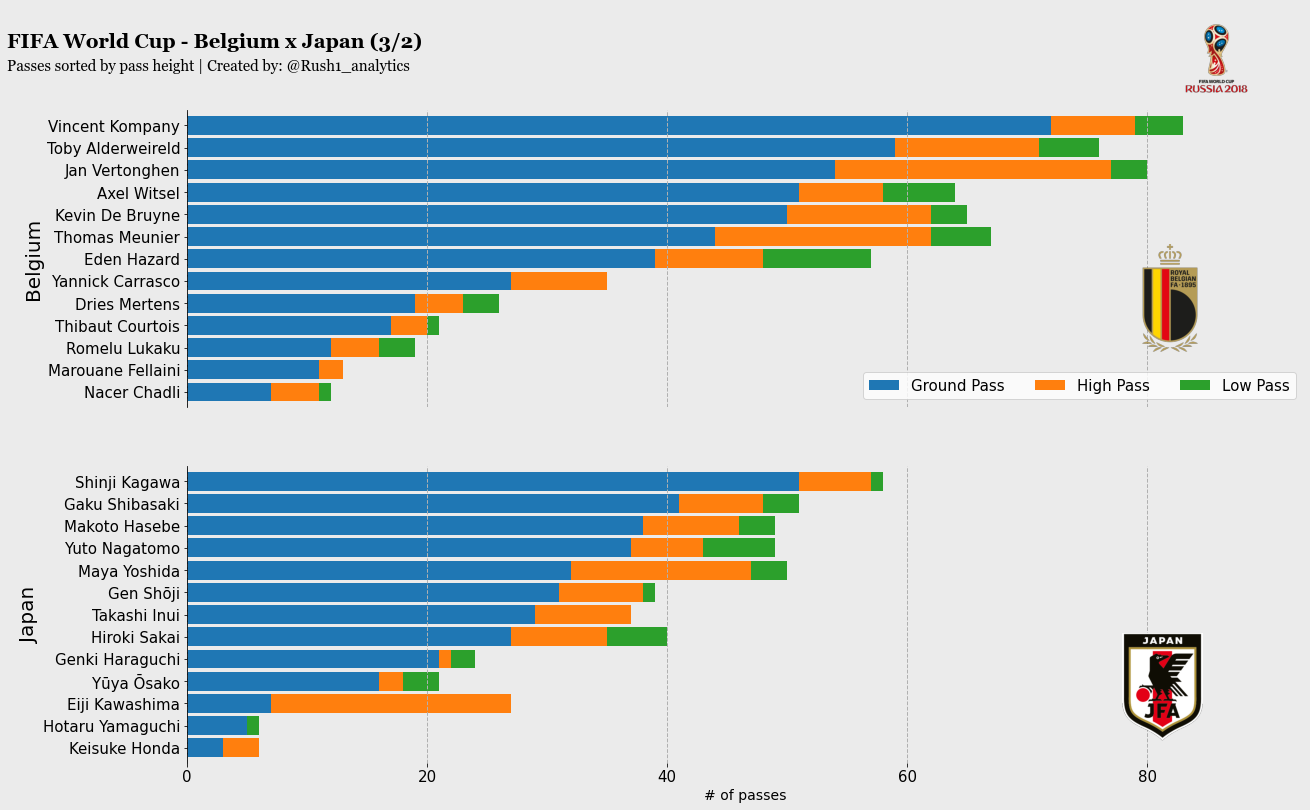

In [198]:
fig ,ax = plt.subplots(figsize=(20,12),nrows=2)

ax[0].set_xlim([0, max(players_passes['count'])+10])
ax[1].set_xlim([0, max(players_passes['count'])+10])

players_passes.drop(columns=['count'],inplace=True)

home_players_passes = players_passes[players_passes['team']==home].reset_index(drop=True)
away_players_passes = players_passes[players_passes['team']==away].reset_index(drop=True)


home_players_passes.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[0],
    mark_right = True,figsize=(20,12),width=0.85)

away_players_passes.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[1],
    mark_right = True,figsize=(20,12),width=0.85)


Logo2 = fig.add_axes((0.745,0.6,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.74,0.15,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

ax[0].set_xticklabels([])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[1].get_legend().remove()

for i in range(0,2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(axis='x',linestyle = '--', linewidth = 1)
    
ax[0].set_ylabel(home,fontsize=20)
ax[1].set_ylabel(away,fontsize=20)
ax[1].set_xlabel('# of passes',fontsize=14)
ax[0].legend(loc='best',ncol=5)

fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

Header = fig.add_axes((0,0.925,0.12*7.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)

Logo2 = fig.add_axes((0.8,0.9,0.08,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header.text(s=f"{competetion} - {home} x {away} ({homeScore}/{awayScore})",x=0,y=0.375,color='black',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Passes sorted by pass height | Created by: @Rush1_analytics",x=0,y=0.015,color='black',fontsize=15,fontname="Georgia")   

fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\trial9.png",dpi=300,bbox_inches="tight",facecolor='#ebebeb')
plt.show()

## الأنشطة الدفاعية

### استقبال التمريرات

In [199]:
events = sb.events(match_id=ID)
events = events[['player','player_id','team','location', 'ball_recovery_recovery_failure','counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type','type']]
keysList = [key for key in dict]
keysList
for player in keysList:
    i=events[events['player_id']==player]
    player_index_list=i.index.to_list()

    player_col =events.columns.get_loc("player")
    for index in player_index_list:
        events.iloc[index,player_col]=dict[player]
recovery = events.loc[events.type=='Ball Receipt*'].reset_index(drop=True)
clearance= events.loc[events.type=='Pressure'].reset_index(drop=True)

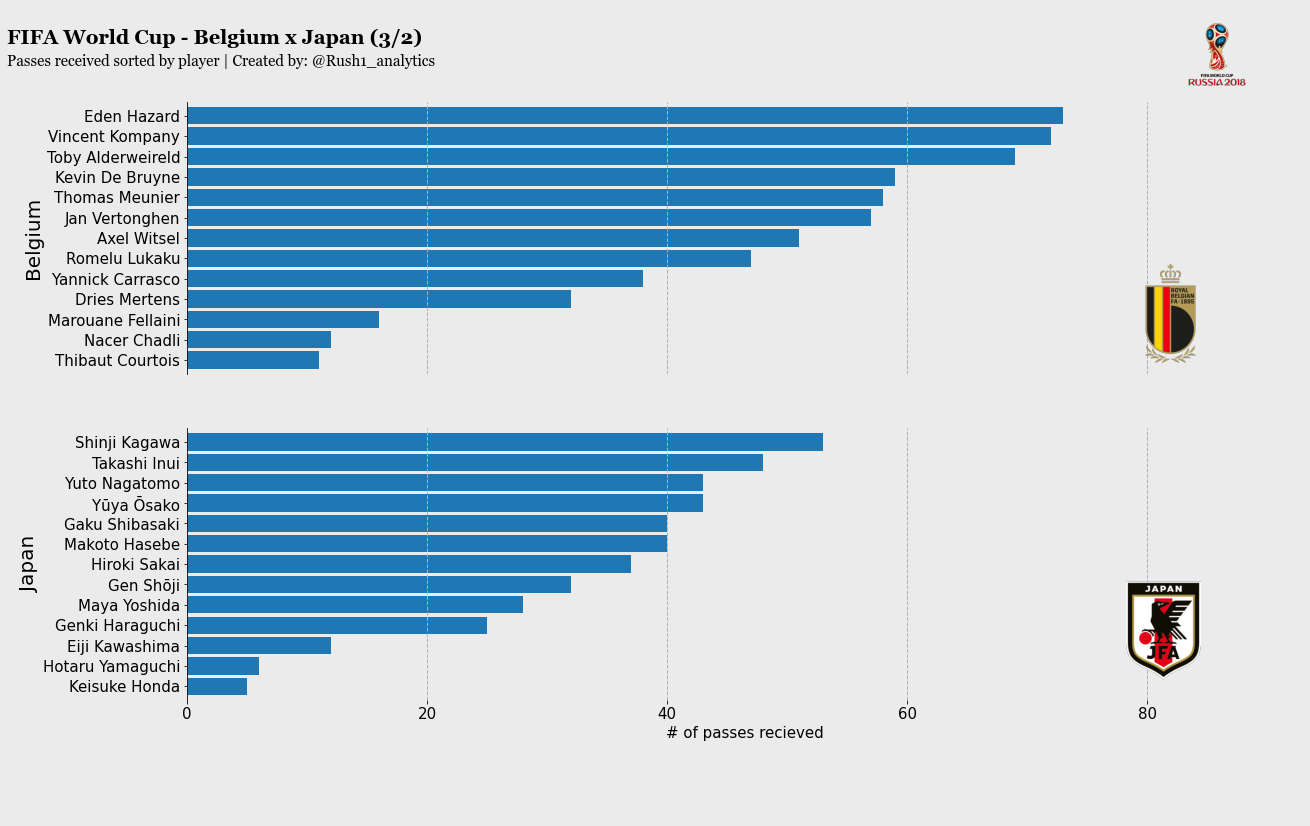

In [200]:
plt.rcParams.update({'font.size':15})

fig ,ax = plt.subplots(figsize=(20,15),nrows=2)


SortedRecov= pd.DataFrame({'count' : recovery.groupby( [ "player", "team"] ).size()}).sort_values(by='count',ascending=True).reset_index()

home_players_recovery = SortedRecov[SortedRecov['team']==home].reset_index(drop=True)
away_players_recovery = SortedRecov[SortedRecov['team']==away].reset_index(drop=True)
home_players_recovery.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[0],
    mark_right = True,figsize=(20,11),width=0.85)

away_players_recovery.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[1],
    mark_right = True,figsize=(20,11),width=0.85)

ax[0].set_xlim([0, max(SortedRecov['count'])+20])
ax[1].set_xlim([0, max(SortedRecov['count'])+20])

#ax[0].invert_xaxis()

Logo2 = fig.add_axes((0.745,0.55,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.74,0.15,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

for i in range(0,2):
    ax[i].get_legend().remove()
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(axis='x',linestyle = '--', linewidth = 1)

ax[0].set_xticklabels([])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].set_ylabel(home,fontsize=20)
ax[1].set_ylabel(away,fontsize=20)
ax[1].set_xlabel('# of passes recieved',fontsize=15)
fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

Header = fig.add_axes((0,0.925,0.12*7.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)

Logo2 = fig.add_axes((0.8,0.9,0.08,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header.text(s=f"{competetion} - {home} x {away} ({homeScore}/{awayScore})",x=0,y=0.375,color='black',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Passes received sorted by player | Created by: @Rush1_analytics",x=0,y=0.015,color='black',fontsize=15,fontname="Georgia")   

Footer = fig.add_axes((0,-0.025,0.12*7.25,0.06*1.25))
Footer.axis('off')
Footer.set_zorder(-1)
Footer.set_facecolor('white')
Footer.grid(False)

plt.show()
fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\trial98.png",dpi=300,bbox_inches="tight",facecolor='#ebebeb')

plt.show()

### فزر حسب الضغط

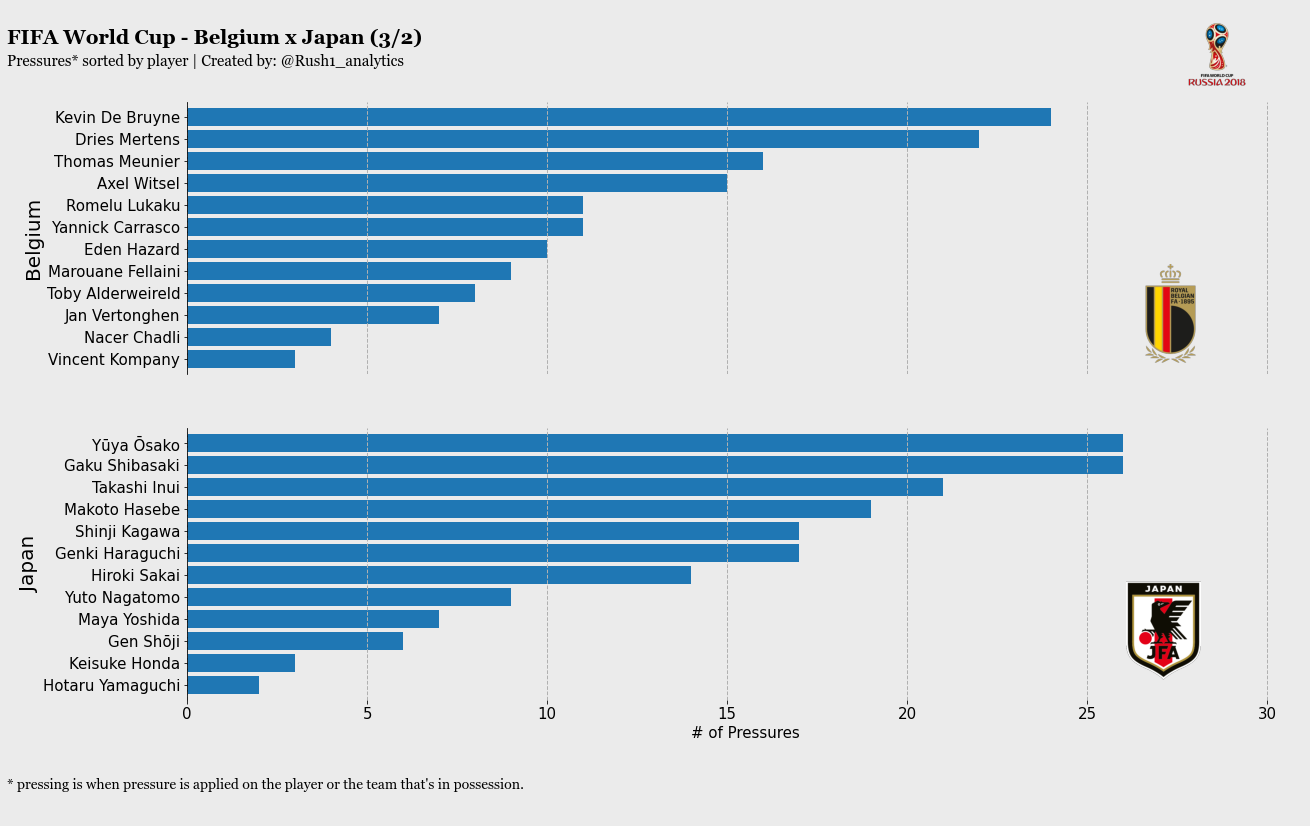

In [201]:
plt.rcParams.update({'font.size':15})

fig ,ax = plt.subplots(figsize=(20,15),nrows=2)


SortedClear= pd.DataFrame({'count' : clearance.groupby( ["player", "team"] ).size()}).sort_values(by='count',ascending=True).reset_index()

home_players_clear = SortedClear[SortedClear['team']==home].reset_index(drop=True)
away_players_clear = SortedClear[SortedClear['team']==away].reset_index(drop=True)
home_players_clear.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[0],
    mark_right = True,figsize=(20,11),width=0.85)

away_players_clear.plot(
    x = 'player',
    kind = 'barh',
    stacked = True,
    ax=ax[1],
    mark_right = True,figsize=(20,11),width=0.85)

ax[0].set_xlim([0, max(SortedClear['count'])+5])
ax[1].set_xlim([0, max(SortedClear['count'])+5])

#ax[0].invert_xaxis()

Logo2 = fig.add_axes((0.745,0.55,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{home}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Logo2 = fig.add_axes((0.74,0.15,0.125,0.125))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{away}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

for i in range(0,2):
    ax[i].get_legend().remove()
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].grid(axis='x',linestyle = '--', linewidth = 1)

ax[0].set_xticklabels([])
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].set_ylabel(home,fontsize=20)
ax[1].set_ylabel(away,fontsize=20)
ax[1].set_xlabel('# of Pressures',fontsize=15)
fig.set_facecolor('#ebebeb')
ax[0].set_facecolor('#ebebeb')
ax[1].set_facecolor('#ebebeb')

Header = fig.add_axes((0,0.925,0.12*7.25,0.06*1.25))
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)

Logo2 = fig.add_axes((0.8,0.9,0.08,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\DataVizMaterial\club badges\{version}.png")
Logo2.imshow(im)
Logo2.set_facecolor('#212429')
Logo2.grid(False)

Header.text(s=f"{competetion} - {home} x {away} ({homeScore}/{awayScore})",x=0,y=0.375,color='black',fontsize=20,fontname="Georgia",fontweight='bold')    
Header.text(s="Pressures* sorted by player | Created by: @Rush1_analytics",x=0,y=0.015,color='black',fontsize=15,fontname="Georgia")   

Footer = fig.add_axes((0,-0.025,0.12*7.25,0.06*1.25))
Footer.axis('off')
Footer.set_zorder(-1)
Footer.set_facecolor('white')
Footer.grid(False)
Footer.text(s=f"* pressing is when pressure is applied on the player or the team that's in possession.",x=0,y=.5,color='black',fontsize=14,fontname="Georgia")

plt.show()
fig.savefig(fr"C:\Users\YahyaRashwan\Desktop\trial98ogfdgi.png",dpi=300,bbox_inches="tight",facecolor='#ebebeb')

plt.show()